In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from io import BytesIO

import PIL, PIL.Image

In [21]:
import seaborn as sns
%matplotlib inline

In [24]:
x, y, z = [np.random.rand(10, 10, 10) for _ in range(3)]

In [25]:
"weight" in dataframe

True

In [26]:
data = {"coacts": x.flatten(), "weight": y.flatten(), "grads": z.flatten().astype(np.float16)}
dataframe = pd.DataFrame(data)

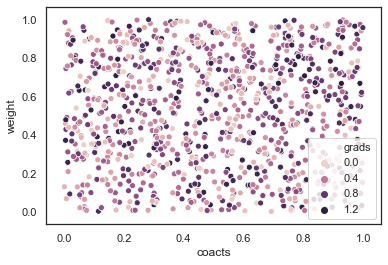

In [27]:
ax = sns.scatterplot(x="coacts", y="weight", hue="grads", data=dataframe);
sns.set(rc={'figure.figsize':(11.7,8.27)}, style="white")

In [14]:
canvas.get_width_height()

(842, 595)

In [12]:
# Store image in a string buffer
buffer = BytesIO()
canvas = ax.figure.canvas
canvas.draw()
pilImage = PIL.Image.frombytes("RGB", canvas.get_width_height(), canvas.tostring_rgb())
pilImage.save(buffer, "PNG")

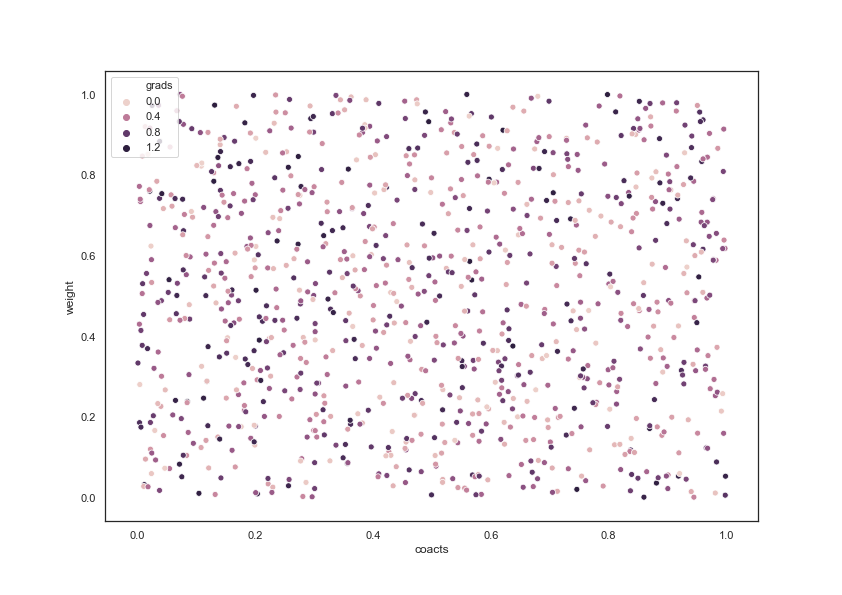

In [13]:
pilImage

## Fun with sparsity

In [7]:
def lineplot(lower_line, middle_line, upper_line, loglog = False, xscale = None, yscale = None, xlim = None, ylim = None, x_list = None, ax = None, line_lable = 'line', x_label = 'x', y_label = 'y', title = 'Plot', color = None):
    
    x_list = x_list if x_list is not None else range(len(middle_line))
    
    # Create the plot object
    fig, ax = (None, ax) if ax is not None else plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    kwargs = {}
    if color     : kwargs['color'] = color
    if line_lable: kwargs['label'] = line_lable
    
    # ax.loglog(x_list, middle_line, lw = 1, alpha = 1, **kwargs)
    if not loglog:
        ax.plot(x_list, middle_line, lw = 1, alpha = 1, **kwargs)
    else:
        ax.loglog(x_list, middle_line, lw = 1, alpha = 1, **kwargs)

    # Adjust x,y scaling.
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)

    # Shade the confidence interval
    kwargs = {}
    if color     : kwargs['color'] = color
    ax.fill_between(x_list, lower_line, upper_line, alpha = 0.4, **kwargs)
    
    if ylim: ax.set_ylim(*ylim)
    if xlim: ax.set_xlim(*xlim)
    
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Display legend
    ax.legend(loc = 'best')


In [8]:
from collections import defaultdict

In [29]:
def calc_onperc(arr):
    size = np.prod(arr.shape)
    return np.sum(arr == 1) / size

trials = 100
N_list = [10, 50, 100, 500, 1000, 2000]
on_perc = 0.1

In [30]:
sparsity_per_row_1 = defaultdict(list)
sparsity_per_column_1 = defaultdict(list)

## Per row method

In [31]:
for _ in range(trials):
    for N in N_list:

        w = np.zeros((N, N))
        for r in range(N):
            t = np.random.rand(1, N) < on_perc
            w[r, :] = t

        # Sparsity per row
        spr = [
            calc_onperc(w[r, :])
            for r in range(N)
        ]

        # Sparsity per column
        spc = [
            calc_onperc(w[:, c])
            for c in range(N)
        ]

        sparsity_per_row_1[N].extend(spr)
        sparsity_per_column_1[N].extend(spc)

## Non-fixed method

In [32]:
sparsity_per_row_2 = defaultdict(list)
sparsity_per_column_2 = defaultdict(list)

In [33]:
for _ in range(trials):
    for N in N_list:

        w = np.zeros((N, N))
        w[:] = (np.random.rand(N, N) < on_perc)

        # Sparsity per row
        spr = [
            calc_onperc(w[r, :])
            for r in range(N)
        ]

        # Sparsity per column
        spc = [
            calc_onperc(w[:, c])
            for c in range(N)
        ]

        sparsity_per_row_2[N].extend(spr)
        sparsity_per_column_2[N].extend(spc)


## Results

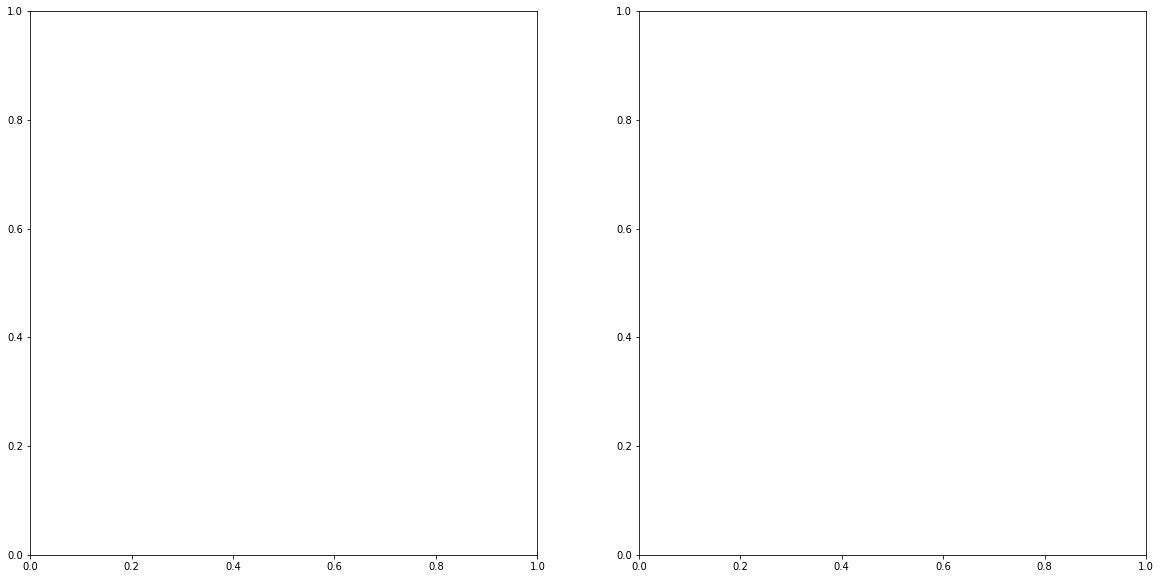

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10));

Plot on-perc by row

In [35]:
lower_1 = [np.percentile(sparsity_per_row_1[N], 0) for N in N_list]
lower_2 = [np.percentile(sparsity_per_row_2[N], 0) for N in N_list]
upper_1 = [np.percentile(sparsity_per_row_1[N], 1) for N in N_list]
upper_2 = [np.percentile(sparsity_per_row_2[N], 1) for N in N_list]
middl_1 = [np.percentile(sparsity_per_row_1[N], 0.5) for N in N_list]
middl_2 = [np.percentile(sparsity_per_row_2[N], 0.5) for N in N_list]

In [36]:
lineplot(
    lower_1, middl_1, upper_1,
    ax = ax[0],
    x_list = N_list,
    line_lable = 'fixed', x_label = 'N', y_label = 'on_perc', 
    title = 'On-perc by Row', color = None
)
lineplot(
    lower_2, middl_2, upper_2, 
    ax = ax[0],
    x_list = N_list,
    line_lable = 'random', x_label = 'N', y_label = 'on_perc', 
    title = 'On-perc by Row', color = None
)

Plot on-perc by col

In [37]:
lower_1b = [np.percentile(sparsity_per_column_1[N], 0) for N in N_list]
lower_2b = [np.percentile(sparsity_per_column_2[N], 0) for N in N_list]
upper_1b = [np.percentile(sparsity_per_column_1[N], 1) for N in N_list]
upper_2b = [np.percentile(sparsity_per_column_2[N], 1) for N in N_list]
middl_1b = [np.percentile(sparsity_per_column_1[N], 0.5) for N in N_list]
middl_2b = [np.percentile(sparsity_per_column_2[N], 0.5) for N in N_list]

In [38]:
lineplot(
    lower_2b, middl_2b, upper_2b, 
    ax = ax[1],
    x_list = N_list,
    line_lable = 'random', x_label = 'N', y_label = 'on_perc', 
    title = 'On-perc by Column', color = None
)
lineplot(
    lower_1b, middl_1b, upper_1b,
    ax = ax[1],
    x_list = N_list,
    line_lable = 'fixed', x_label = 'N', y_label = 'on_perc', 
    title = 'On-perc by Column', color = None
)


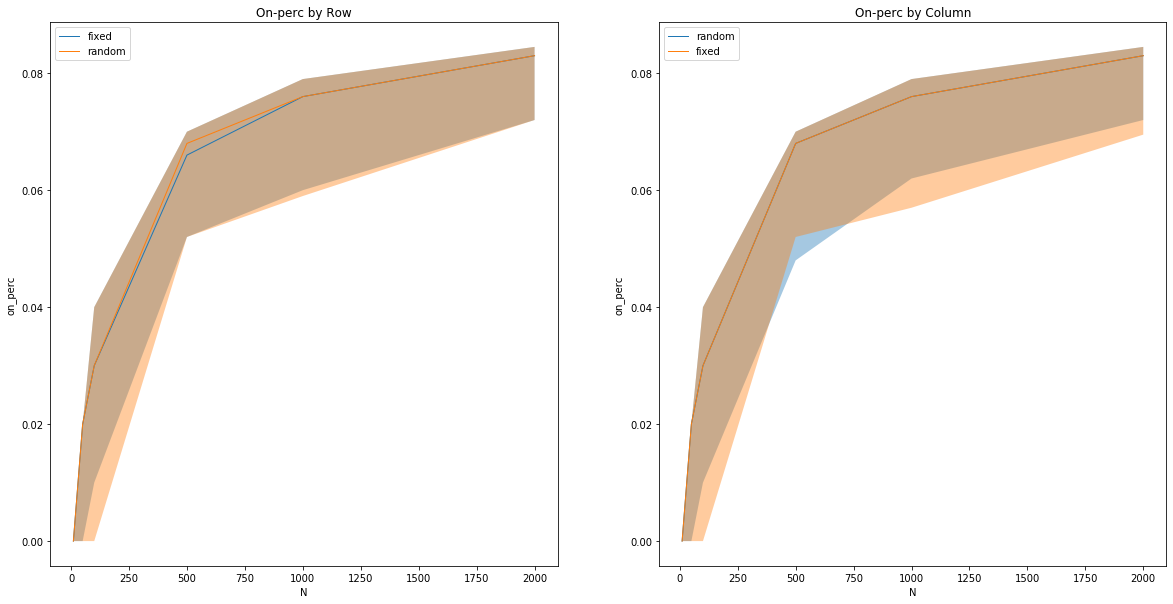

In [39]:
fig

# Fun with random stochastic matrices

In [41]:
import random

k = 10

result = [[random.uniform(0, 0.1 / k) for i in range(k)] for j in range(k)]
for j, r in enumerate(result):
    r[j] += 1 - sum(r)
    
w = np.zeros((k, k))
w[:] = np.array(result) < 0.1
w

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])